In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plot
from nltk.tokenize import RegexpTokenizer

In [6]:
#read text file using encoding = utf-8 
file = open('Text_3.txt', 'r', encoding="utf8")

#converting text to lower case and removing digits from string
text = file.read().lower().translate(str.maketrans('', '', '0123456789'))

#intializing token to separate word from string
tokenizer = RegexpTokenizer(r'\w+')

#retreiving list of words using tokenizer
words = tokenizer.tokenize(text)

#generating word dataframe
df = pd.DataFrame(words, columns=['word'])

#calculating frequency of word by grouping all words using pandas
df = df.groupby('word').size().reset_index(name='frequency')

#generating rank column in dataframe and assign 0 as default
df['rank'] = 0

#retreiving all the unique frequency and sorting in descending order
u_frq = sorted(set(df['frequency']), reverse=True)

#intializing rank varibale
rank = 1

#iterating through all the frequencies
for frq in u_frq:
    
    #assigning rabk to frequency
    df.loc[df['frequency'] == frq, 'rank'] = rank
    
    #incrementing rank by 1
    rank += 1

df.head(20)

,word,frequency,rank
0,a,301,3
1,ability,2,70
2,able,5,67
3,about,29,43
4,above,7,65
5,absence,2,70
6,absolutely,1,71
7,abstract,1,71
8,abstraction,1,71
9,accidentally,1,71


In [7]:
#calculating proportional inverse for K
df['prp_inv'] = 1 / df['rank']

#calculating constant K
K = 1 / df['prp_inv'].sum()

#calculating function output
df['function'] = K / df['rank']

#sorting frequency column
df = df.sort_values(by=['frequency'])

In [8]:
#defining function for plotting graph
def plotGraph(x_clmn, y_clmn, x_lbl, y_lbl, title):
    
    #setting figure size
    plot.figure(figsize=(10,5))
    
    #assigning X and Y column
    plot.plot(x_clmn, y_clmn)
    
    #setting X label
    plot.xlabel(x_lbl)
    
    #setting Y label
    plot.ylabel(y_lbl)
    
    #setting graph title
    plot.title(title, fontsize=15)
    
    #displaying graph
    plot.show()

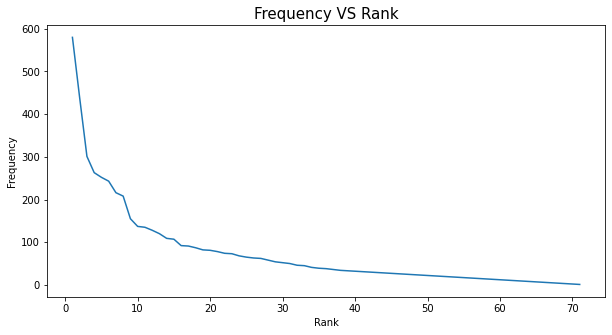

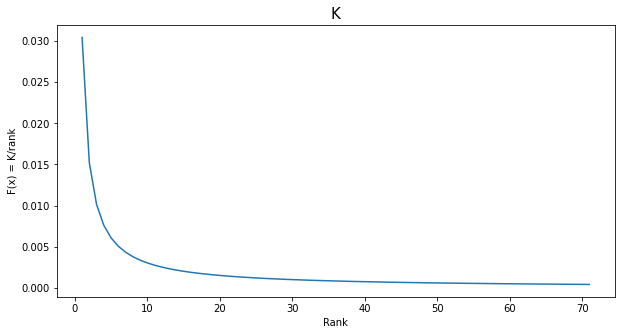

In [9]:
#plotting rank vs frequency graph
plotGraph(df['rank'], df['frequency'], 'Rank', 'Frequency', 'Frequency VS Rank')

#plotting function output and rank graph = K 
plotGraph(df['rank'], df['function'], 'Rank', 'F(x) = K/rank', 'K')